# "Изменение разрешения данных"

In [9]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 

# Понижение разрешения (downsampling)

In [10]:
df = pd.read_csv('./data/gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df.head()

,ts,open,high,low,close,vol
0,2018-01-02 02:01:00,1305.3,1305.9,1304.6,1304.7,407
1,2018-01-02 02:02:00,1304.7,1305.1,1304.7,1305.0,91
2,2018-01-02 02:03:00,1305.0,1305.4,1305.0,1305.4,42
3,2018-01-02 02:04:00,1305.4,1305.5,1305.1,1305.2,89
4,2018-01-02 02:05:00,1305.2,1305.2,1305.1,1305.1,23


C:\Users\Admin\AppData\Local\Temp\ipykernel_6620\659710867.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  downsampled = df.resample('1H').apply(conversion)


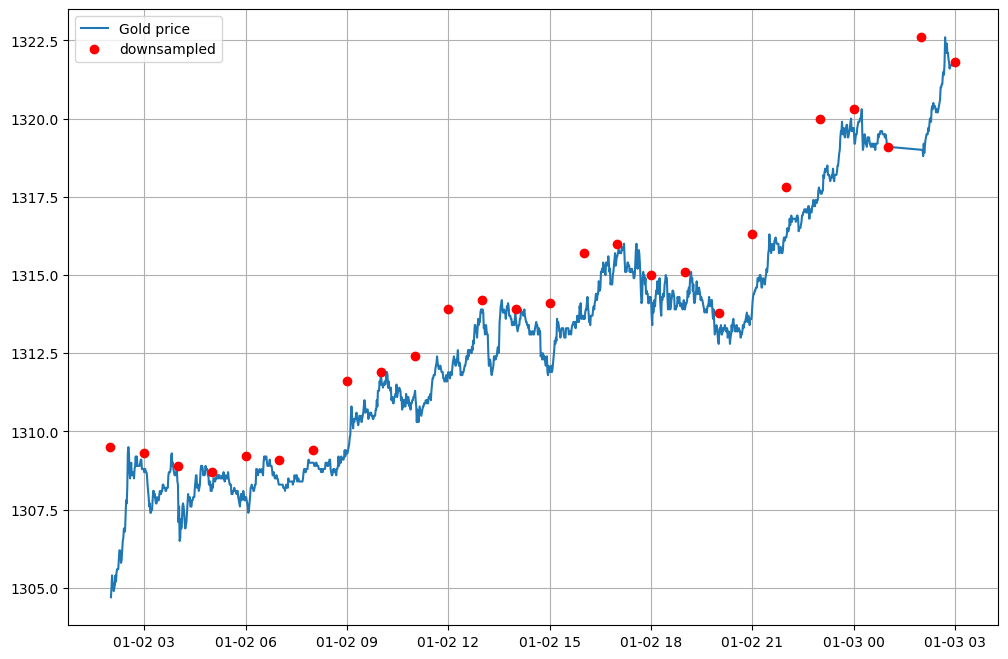

,ts,open,close,vol,high,low
0,2018-01-02 02:00:00,1305.3,1309.5,5284,1309.7,1304.6
1,2018-01-02 03:00:00,1308.8,1309.3,4906,1309.3,1307.3
2,2018-01-02 04:00:00,1308.4,1308.9,7923,1309.0,1306.2
3,2018-01-02 05:00:00,1308.0,1308.7,4039,1308.7,1307.4
4,2018-01-02 06:00:00,1307.8,1309.2,4529,1309.3,1307.3


In [11]:
df = df.iloc[:1440]

## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
    return min(value)

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'first', ## для цены открытия берём первое значение 
    'close':  'max',  ## для цены закрытия - cреднее
    'vol'  :  'sum',   ## суммируем объёмы сделок в этот час
    'high' :  'max',   ## берём максимум пикового значения
    'low'  :  myFunc   ## можно определить свою функцию аггрегации для наименьшого значения
}

## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
downsampled = df.resample('1H').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.ts, df.close)
ax.plot(downsampled.ts, downsampled.close, c='r', marker='o', lw=0)
ax.legend(['Gold price', 'downsampled'])
ax.grid()
plt.show()

downsampled.head()

In [12]:
print(f'len(df) = {len(df)}')
print(f'len(downsampled) = {len(downsampled)}')

len(df) = 1440
len(downsampled) = 26


# Upsampling

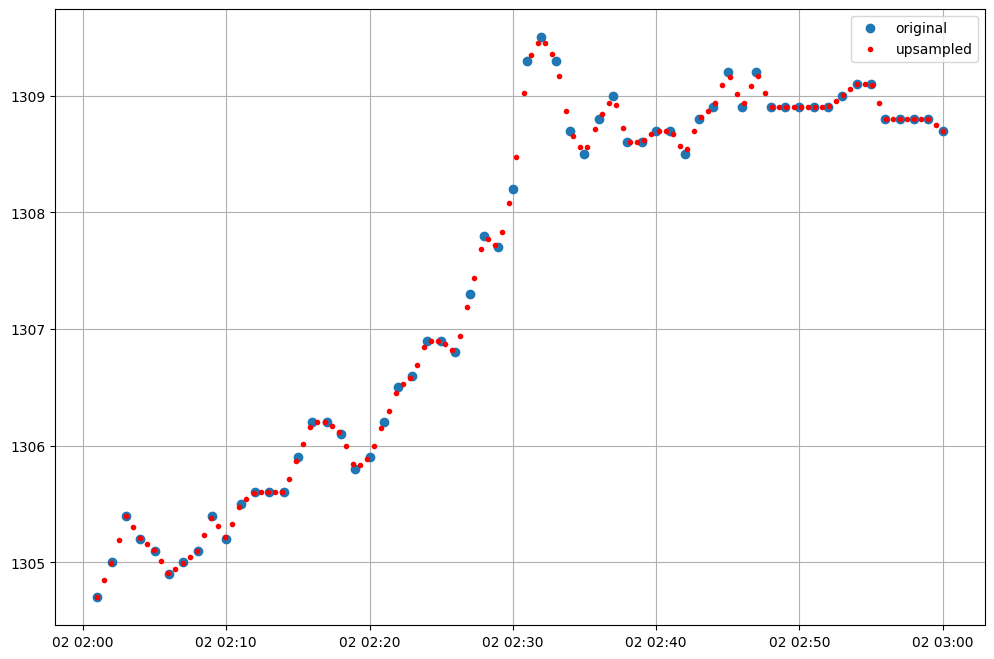

In [13]:
df = pd.read_csv('./data/gold_clean.csv')

df['unixtime'] = df.ts
## преобразуем юниксовое время в таймстемп
df['ts'] = pd.to_datetime(df.ts)
## возьмём только первый час данных (60 минут)
df = df.iloc[:60]

## cделаем интерполяционную сетку, 120 значений (каждые 30 секунд)
## np.interp не умеет работать с таймстемпами, поэтому будем использовать
## юниксовое время, являющееся просто int
ti = np.linspace(df.unixtime.min(), df.unixtime.max(), 120)
## интерполируем
upsampled = np.interp(ti, df.unixtime, df.close)
## переведём интерполяционную сетку в таймстемп
ts = pd.to_datetime(ti)

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
## исходные данные
ax.plot(df.ts, df.close, marker='o', lw=0)
## красными кружками помечаем моменты, в которые мы теперь имеем данные
ax.plot(ts, upsampled, c='r', marker='o', lw=0, markersize=3)
ax.legend(['original', 'upsampled'])
ax.grid()
plt.show()

# Понижение разрешения (Downsampling)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6620\1518031351.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('1H').apply(conversion)


,timestamp,close
0,2018-01-02 02:01:00,1304.7
1,2018-01-02 02:02:00,1305.0
2,2018-01-02 02:03:00,1305.4
3,2018-01-02 02:04:00,1305.2
4,2018-01-02 02:05:00,1305.1


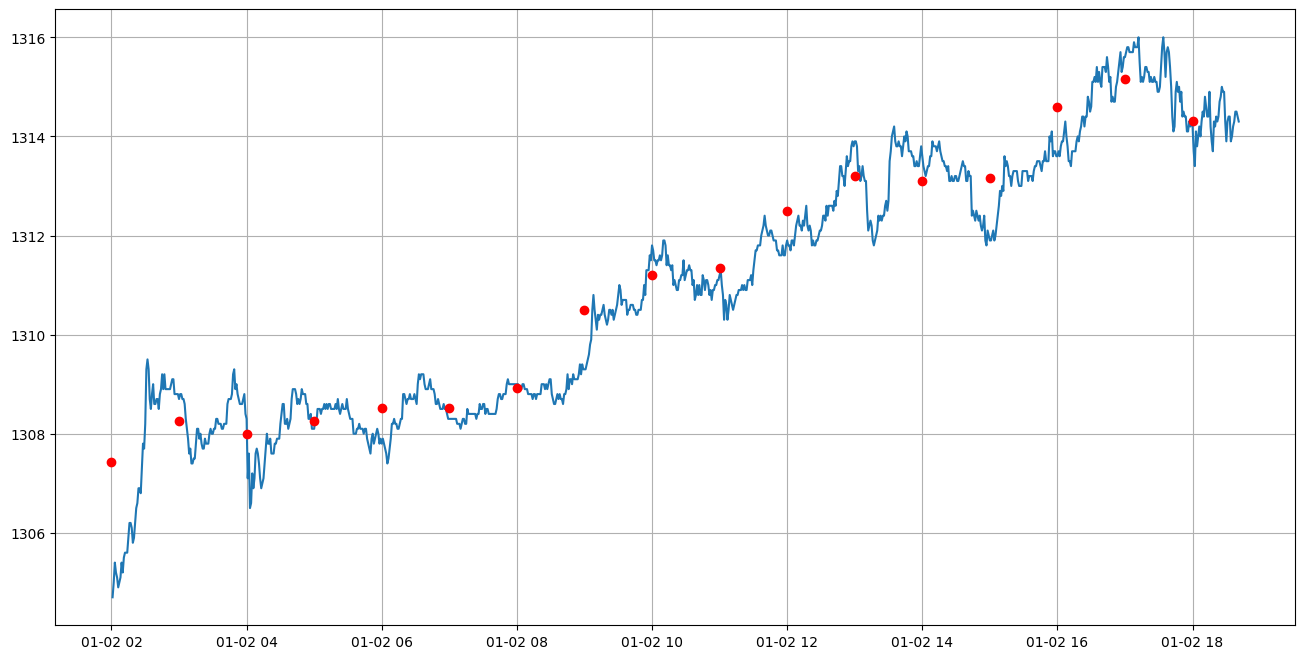

In [14]:
df = pd.read_csv('./data/gold_clean.csv')
df = df.iloc[:1000]

df['timestamp'] = pd.to_datetime(df.ts) 

df = df[['timestamp', 'close']]
conversion = {'close' : 'mean'}

df = df.set_index('timestamp')
df_resampled = df.resample('1H').apply(conversion)
df = df.reset_index()
df_resampled = df_resampled.reset_index()

f, ax = plt.subplots(figsize=(16, 8))
ax.plot(df.timestamp, df.close)
ax.plot(df_resampled.timestamp, df_resampled.close, c='r', lw=0, marker='o')
ax.grid()

df.head()

# Используйте этот код для решения заданий.

In [27]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime
filePath = './data/EURUSD_1.csv'
data = pd.read_csv(filePath)
data['ts'] = pd.to_datetime(data.ts)
print(f'data.shape = {data.shape}')

data.head()
df = data.copy()
df = df[df.ts < '2017-01-02']

fig = go.Figure(data  = [go.Candlestick(
            x=df['ts'],
            open  = df['open'],
            high  = df['high'],
            low   = df['low'],
            close = df['close']
        )])

fig.show()

data.shape = (121674, 6)


# Задания 8.10.1 - 8.10.5

Понизьте разрешение ряда с 1 минуты до 8 часов. Результат округлите до пятого знака после запятой.

In [29]:
data.head()

,open,high,low,close,vol,ts
0,1.05135,1.05192,1.05134,1.05187,65,2017-01-02 09:00:00
1,1.05185,1.05198,1.05153,1.05168,58,2017-01-02 09:01:00
2,1.05175,1.05201,1.05149,1.05154,33,2017-01-02 09:02:00
3,1.05177,1.05202,1.05177,1.05200,20,2017-01-02 09:03:00
4,1.05202,1.05202,1.05198,1.05202,7,2017-01-02 09:04:00


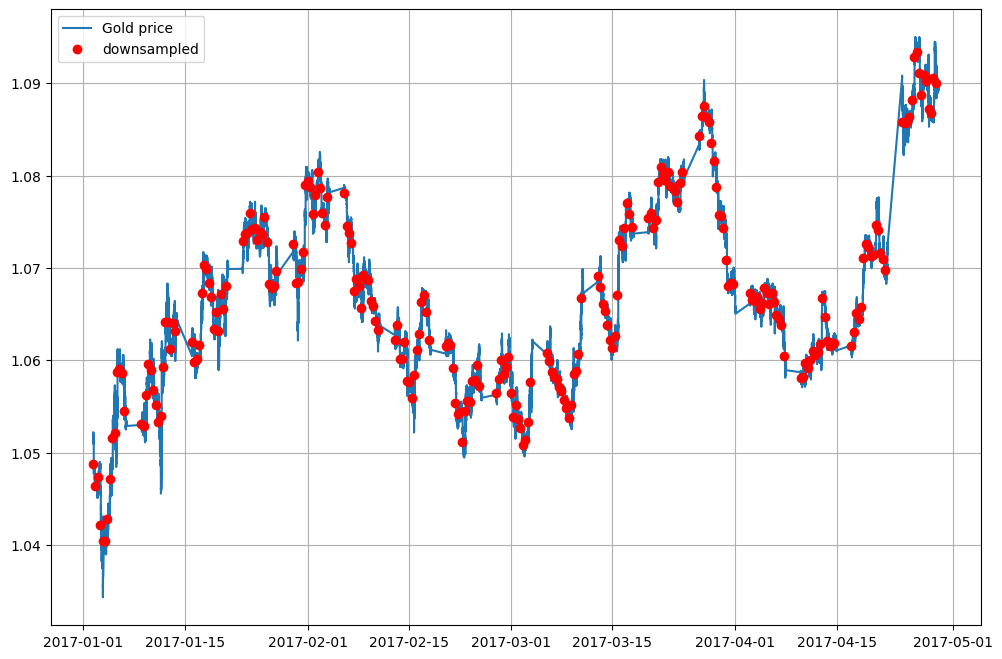

In [37]:
df = data.copy()

## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
    return (value.median() + value.mean()) / 2

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'median', ## для цены открытия берём первое значение
    'close':  'mean',  ## для цены закрытия - cреднее
    'vol'  :  myFunc,   ## суммируем объёмы сделок в этот час
    'high' :  'max',   ## берём максимум пикового значения
    'low'  :  'min'   ## можно определить свою функцию аггрегации для наименьшого значения
}

## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
downsampled = df.resample('8h').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.ts, df.close)
ax.plot(downsampled.ts, downsampled.close, c='r', marker='o', lw=0)
ax.legend(['Gold price', 'downsampled'])
ax.grid()
plt.show()


In [62]:
downsampled[downsampled.ts == '2017-01-05 08:00:00']


,ts,open,close,vol,high,low
9,2017-01-05 08:00:00,1.05116,1.052138,481.334375,1.05743,1.04823


# 8.10.6 - 8.10.8

Отфильтруйте ряд, оставив в нём лишь цены до 2017-01-03 включительно.

Используя те же аггрегирующие функции, при помощи функции resample повысьте разрешение отфильтрованного ряда до 10 секунд.

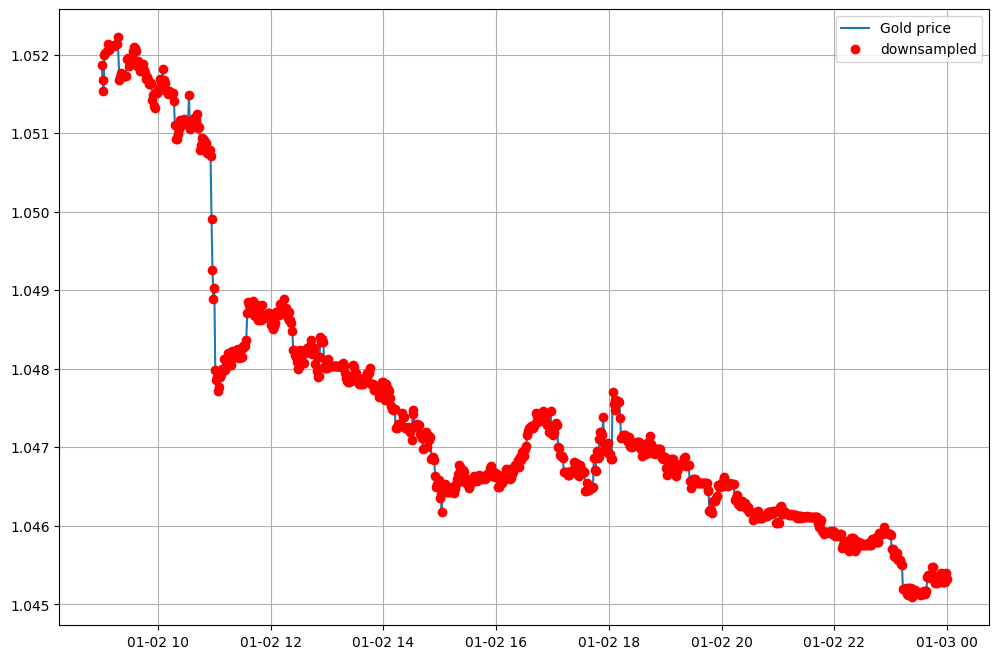

In [63]:
df = data.copy()
df = df[df.ts <= '2017-01-03']
## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
    return (value.median() + value.mean()) / 2

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'median', ## для цены открытия берём первое значение
    'close':  'mean',  ## для цены закрытия - cреднее
    'vol'  :  myFunc,   ## суммируем объёмы сделок в этот час
    'high' :  'max',   ## берём максимум пикового значения
    'low'  :  'min'   ## можно определить свою функцию аггрегации для наименьшого значения
}

## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
downsampled = df.resample('10s').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.ts, df.close)
ax.plot(downsampled.ts, downsampled.close, c='r', marker='o', lw=0)
ax.legend(['Gold price', 'downsampled'])
ax.grid()
plt.show()

In [89]:
downsampled.isna().sum()


ts          0
open     4508
close    4508
vol      4508
high     4508
low      4508
dtype: int64

In [91]:
downsampled['open_linear'] = downsampled.open.interpolate(method='linear')

downsampled[downsampled['ts'] == '2017-01-02 09:00:40']


,ts,open,close,vol,high,low,open_linear
4,2017-01-02 09:00:40,NaN,NaN,NaN,NaN,NaN,1.051683


In [94]:
downsampled['close_nearest'] = downsampled.close.interpolate(method='nearest')

downsampled[downsampled['ts'] == '2017-01-02 09:00:40']


,ts,open,close,vol,high,low,open_linear,close_nearest
4,2017-01-02 09:00:40,NaN,NaN,NaN,NaN,NaN,1.051683,1.05168


In [95]:
df = data.copy()
df = df[(df.ts >= '2017-01-05 12:00:00') & (df.ts <= '2017-01-05 13:00:00')]
df['unixtime'] = df.ts.astype(np.int64)

fig = go.Figure(data  = [go.Candlestick(
            x=df['ts'],
            open  = df['open'],
            high  = df['high'],
            low   = df['low'],
            close = df['close']
        )])

fig.show()

df.head()

,open,high,low,close,vol,ts,unixtime
4491,1.05044,1.05052,1.05032,1.05048,530,2017-01-05 12:00:00,1483617600000000000
4492,1.05048,1.05053,1.05031,1.05046,447,2017-01-05 12:01:00,1483617660000000000
4493,1.05046,1.05080,1.05046,1.05075,516,2017-01-05 12:02:00,1483617720000000000
4494,1.05075,1.05093,1.05063,1.05087,477,2017-01-05 12:03:00,1483617780000000000
4495,1.05087,1.05118,1.05087,1.05101,456,2017-01-05 12:04:00,1483617840000000000


In [100]:



## cделаем интерполяционную сетку, 120 значений (каждые 30 секунд)
## np.interp не умеет работать с таймстемпами, поэтому будем использовать
## юниксовое время, являющееся просто int
ti = np.linspace(df.unixtime.min(), df.unixtime.max(), 135)
## интерполируем
upsampled = np.interp(ti, df.unixtime, df.close)
## переведём интерполяционную сетку в таймстемп
ts = pd.to_datetime(ti)

round(upsampled.mean(), 6)




1.050295